In [66]:
import numpy as np
from numpy import *
from numpy.linalg import *
import scipy.linalg
from scipy.linalg import *
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
import random
from reconstruction import *
from CadzowAlg import Cadzow
import control as ct
from control.matlab import *
np.random.seed(0)

## Reconstruction using Cadzow Algorithm:

In the next example $A in \mathbb R^{15\times 15}$ is the circulant matrix whose first column in $[0,0,0,\dots,0,1]$ and the sampling matrix is $S= [1,0,0,\dots,0]$, i.e we only observe the first coordinate of the estate $f$. This is an observable system

The plots above show that the min rank needen in the Cadzow algorithm is $r=8$, when the reconstruction is perfect!

## Example 1

15


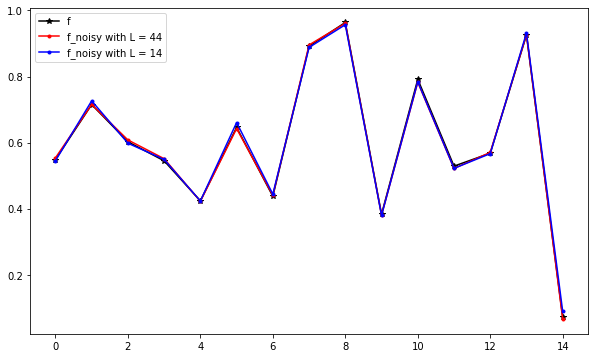

In [67]:
#a = np.array([1, 7/8, 3/4, 5/8, 1/2, 3/8, 1/4, 1/8, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8])
#a = np.array([1, 7/8, 3/4, 5/8, 1/2, 1/2, 5/8, 3/4,7/8])
#a = np.array([1,1/2,1/8,0,0,0,0,0,0,0,0,0,0,0,0,0,1/8,1/2])
a = zeros(15)
a[-1] = 1
A = circulant(a)
d = a.size

Omega = [0] # [0,3,6,9,12]
#Omega = [0, 4, 6, 9, 12, 14, 17]    # con este Omega el sistema es observable!
sigmas = [1e-2, 1e-3, 1e-4, 1e-5]
S = Obs_op(Omega,d)
print(matrix_rank(obsv(A, S)))
f = np.random.rand(d)
# Diferente time levesl L1, L2
L1 = 3*d -1
L2 = d-1
Y1 = Samples(f, A, Omega, L1)
Y2 = Samples(f, A, Omega, L2)
Y_tilde1 = NoisySamples(Y1, 1e-2)
Y_tilde2 = NoisySamples(Y2, 1e-2)
f_noisy1 = recover_signal(A, S, Y_tilde1)
f_noisy2 = recover_signal(A, S, Y_tilde2)

plt.figure(figsize=(10,6))
plt.plot(range(f.size), f, c='black', marker = '*',label ='f')
plt.plot(range(f.size), f_noisy1, c='red', marker = '.',label ='f_noisy with L = '+ str(L1))
plt.plot(range(f.size), f_noisy2, c='blue', marker = '.',label ='f_noisy with L = '+ str(L2))


plt.legend()

### Rank of the Hankel matrix of the time series:

In [68]:
tol = (4/np.sqrt(3))*np.sqrt(L1//2+1)*sigmas[0]
# L1 = 3d-1
H1 = hankel(Y_tilde1[0,0: L1//2 +1], Y_tilde1[0,L1//2 :L1+1])
_, SigmaH1, _ = svd(H1)
print(matrix_rank(H1))
SigmaH1_tol = SigmaH1
SigmaH1_tol[SigmaH1 < tol] = 0
print(SigmaH1_tol)


# L2 = d-1
H2 = hankel(Y_tilde2[0,0: L2//2 +1], Y_tilde2[0,L2//2 :L2+1])
_, SigmaH2, _ = svd(H2)
print(matrix_rank(H2))
SigmaH2_tol = SigmaH2
SigmaH2_tol[SigmaH2 < tol] = 0
print(SigmaH2_tol, SigmaH2)

23
[13.99106048  2.54898209  2.35987223  1.65972093  1.61910571  1.60550178
  1.54572585  1.13671049  0.97270431  0.80102128  0.76939949  0.55805856
  0.52719942  0.42632838  0.38820443  0.          0.          0.
  0.          0.          0.          0.          0.        ]
8
[5.12217786 1.11090764 0.76398958 0.57185883 0.53165927 0.42621046
 0.27477689 0.25640625] [5.12217786 1.11090764 0.76398958 0.57185883 0.53165927 0.42621046
 0.27477689 0.25640625]


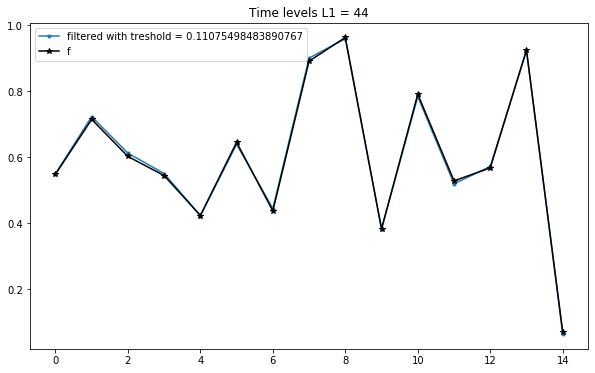

In [69]:
plt.figure(figsize=(10,6))
Y_denoi1 = Cadzow(Y_tilde1, 10, d, sigmas[0])
f_filter1 = recover_signal(A, S, Y_denoi1)
plt.plot(range(d), f_filter1.real, marker = '.', label ='filtered with treshold = ' + str(tol))
#plt.plot(range(d), f_noisy, marker = '.', c ='blue', label= 'no filter' )
plt.plot(range(d), f, marker = '*', c = 'black', label = 'f')
plt.title('Time levels L1 = ' +str(L1))
plt.legend()

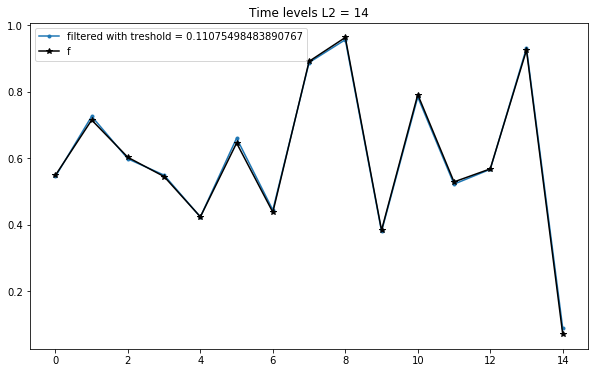

In [70]:
plt.figure(figsize=(10,6))
Y_denoi2 = Cadzow(Y_tilde2, 10, d, sigmas[0])
f_filter2 = recover_signal(A, S, Y_denoi2)
plt.plot(range(d), f_filter2.real, marker = '.', label ='filtered with treshold = ' + str(tol))
#plt.plot(range(d), f_noisy, marker = '.', c ='blue', label= 'no filter' )
plt.plot(range(d), f, marker = '*', c = 'black', label = 'f')
plt.title('Time levels L2 = ' +str(L2))
plt.legend()

## Example 2:

$A= circulant(a)$ with $a=[1,0,0,0,0,\dots,0,1]\in \mathbb R^d$

15
1


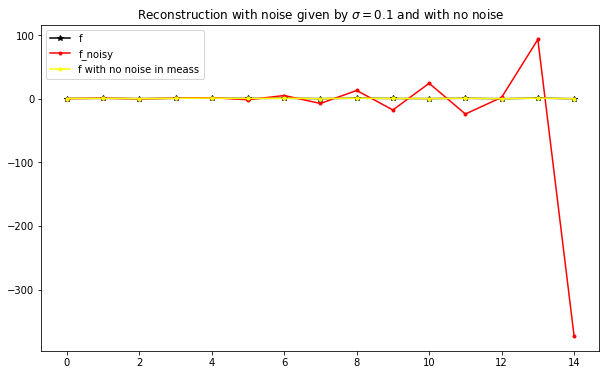

In [71]:
a = np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,1])
A = circulant(a)
d = a.size

Omega = [0]   #[1,4,7,10,13] #[0,3,6,9,12]
#Omega = [0, 4, 6, 9, 12, 14, 17]    # con este Omega el sistema es observable!
sigmas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
S = Obs_op(Omega,d)
print(matrix_rank(obsv(A, S)))
f = np.random.rand(d)
L = d-1
Y = Samples(f, A, Omega, L)
Y_tilde = NoisySamples(Y, sigmas[0])
print(matrix_rank(Y_tilde))
f_noisy = recover_signal(A, S, Y_tilde)
f_clean = recover_signal(A, S, Y)

plt.figure(figsize=(10,6))
plt.plot(range(f.size), f, c='black', marker = '*',label ='f')
plt.plot(range(f.size), f_noisy, c='red', marker = '.',label ='f_noisy')
plt.plot(range(f.size), f_clean, c='yellow', marker = '.',label ='f with no noise in meass')
plt.title('Reconstruction with noise given by $\sigma = $' + str(sigmas[0]) + ' and with no noise' )
plt.legend()

In [72]:
Y_tilde

array([[1.48874507e-01, 8.78720193e-01, 1.45239235e+00, 2.53927731e+00,
        6.30393217e+00, 1.47351387e+01, 3.29690604e+01, 7.00599969e+01,
        1.42576433e+02, 2.81615986e+02, 5.45513932e+02, 1.04873770e+03,
        2.01025302e+03, 3.85316925e+03, 7.39121028e+03]])

## Lets compute the ranks for each hankel matrix form with the first (amd only) row of Y:

In [73]:
tol1 = (4/np.sqrt(3))*np.sqrt(L//2+1)*sigmas[0]
X1 = hankel(Y_tilde[0,0:L//2+1], Y_tilde[0,L//2:L+1])
_,Sigma1,_ = svd(X1)
Sigma1tol = Sigma1
Sigma1tol[Sigma1<tol1] = 0
print(Sigma1, Sigma1tol)

[1.01489042e+04 2.65525180e+01 9.36343476e+00 1.11838604e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00] [1.01489042e+04 2.65525180e+01 9.36343476e+00 1.11838604e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


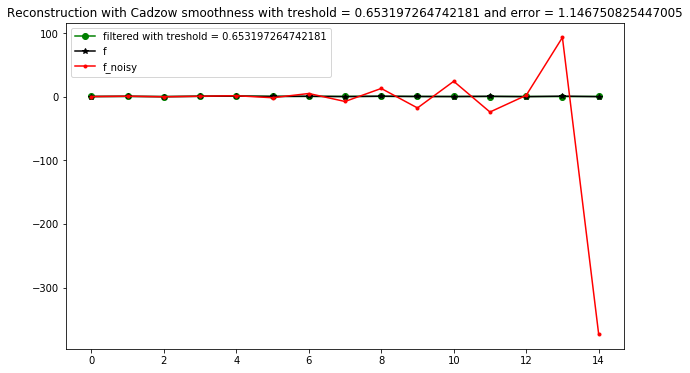

In [74]:
plt.figure(figsize=(10,6))
Y_denoi = Cadzow(Y_tilde, 10, d, sigmas[0])
f_filter = recover_signal(A, S, Y_denoi)
error = norm(f - f_filter,2)
plt.plot(range(d), f_filter.real, c = 'green', marker = 'o', label ='filtered with treshold = ' + str(tol1))
plt.plot(range(d), f, marker = '*', c = 'black', label = 'f')
plt.plot(range(f_noisy.size), f_noisy, c='red', marker = '.',label ='f_noisy')
plt.title('Reconstruction with Cadzow smoothness with treshold = ' + str(tol1) + ' and error = ' 
          + str(norm(f - f_filter,2)))
plt.legend()

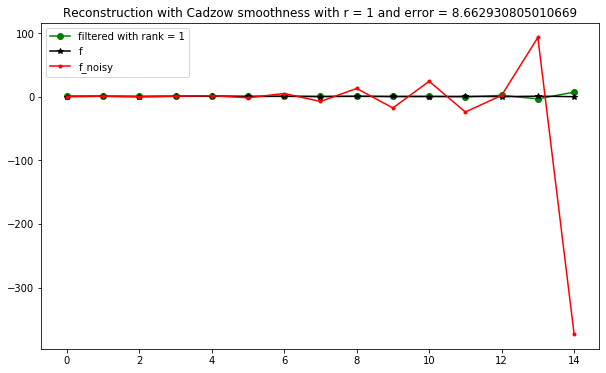

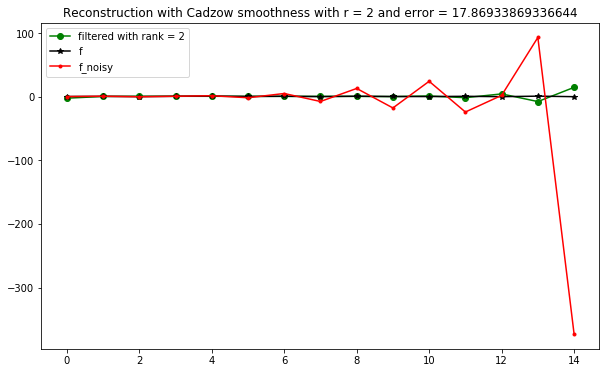

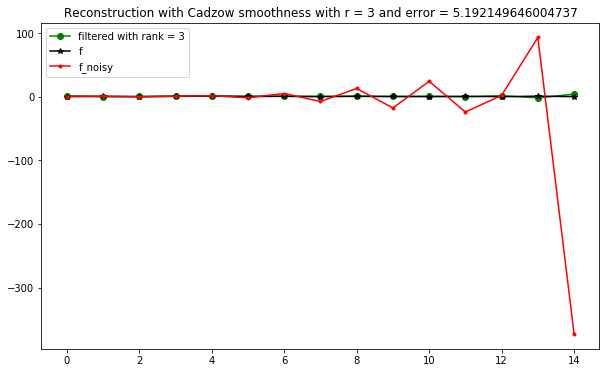

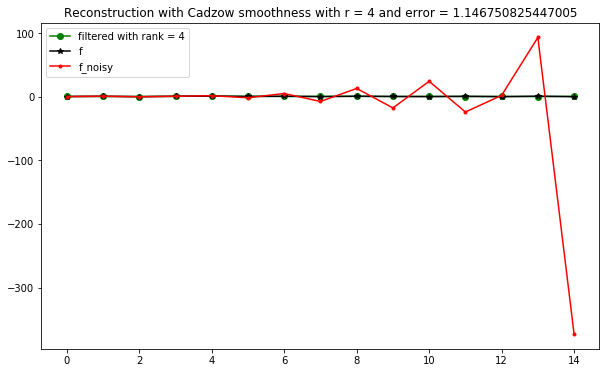

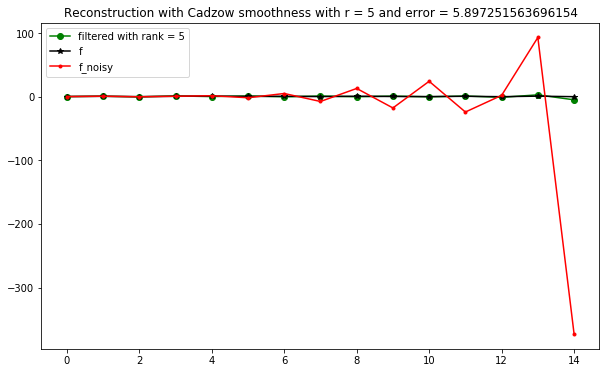

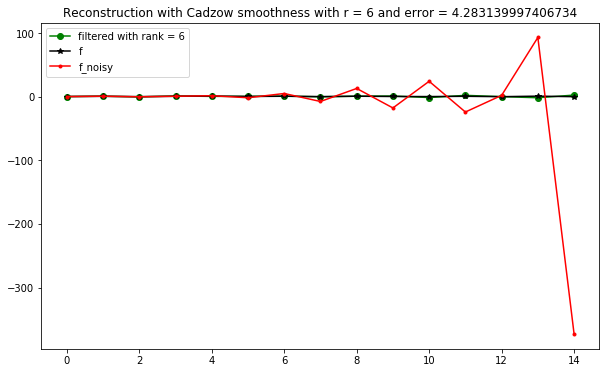

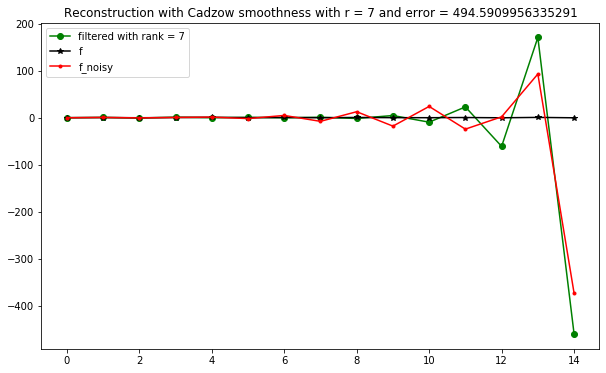

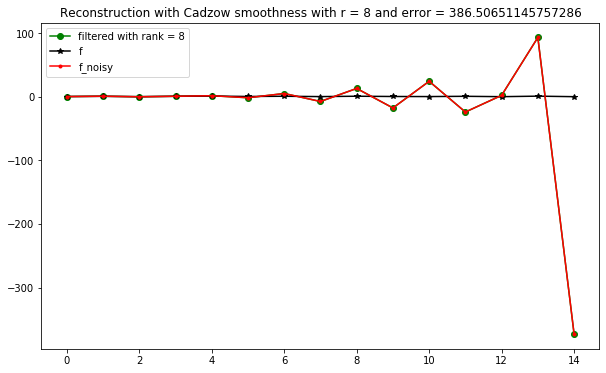

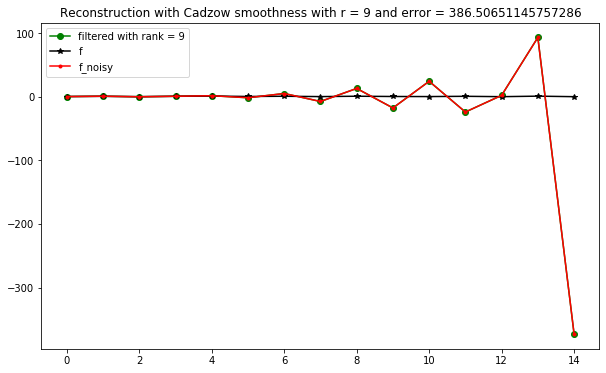

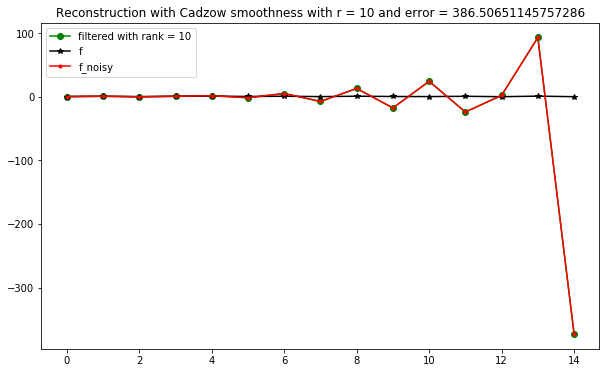

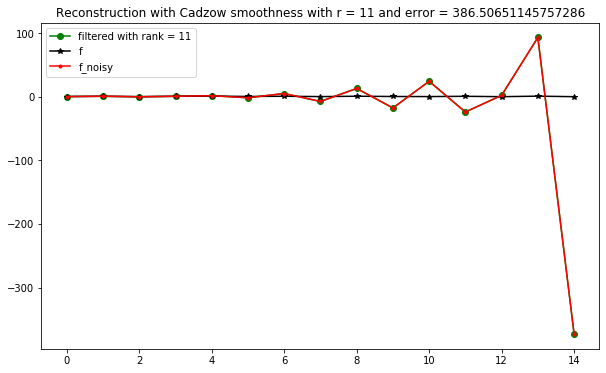

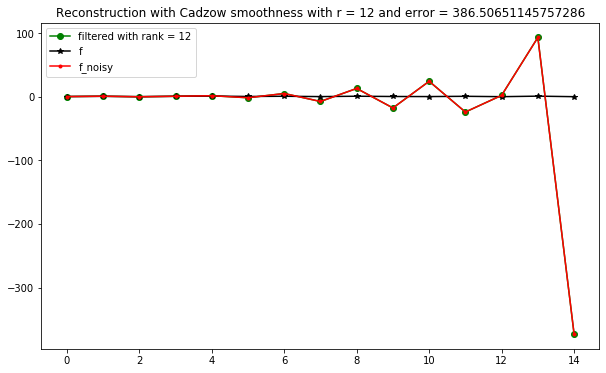

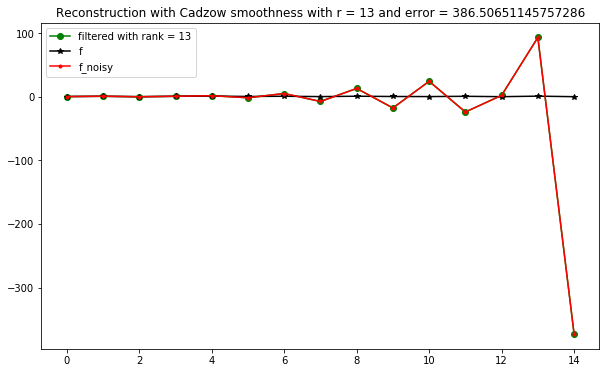

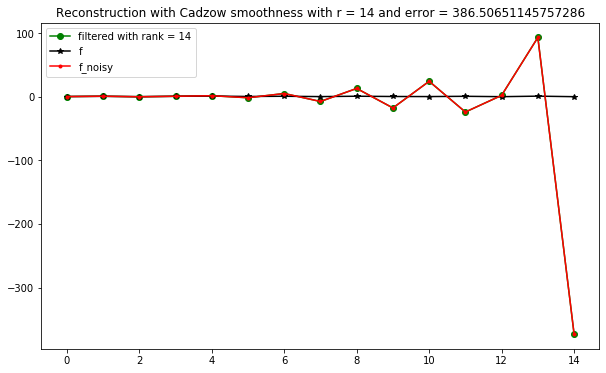

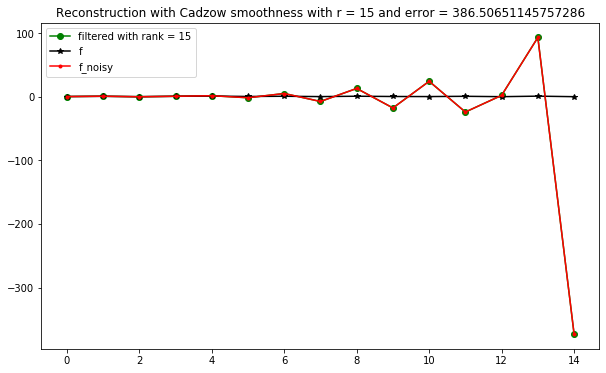

In [75]:
errors = []
for r in range(1,16) :
    plt.figure(figsize=(10,6))
    Y_denoi = Cadzow(Y_tilde, 10, d,sigmas[0], r)
    f_filter = recover_signal(A, S, Y_denoi)
    errors.append(norm(f - f_filter,2))
    plt.plot(range(d), f_filter.real, c = 'green', marker = 'o', label ='filtered with rank = ' + str(r))
    plt.plot(range(d), f, marker = '*', c = 'black', label = 'f')
    plt.plot(range(f_noisy.size), f_noisy, c='red', marker = '.',label ='f_noisy')
    plt.title('Reconstruction with Cadzow smoothness with r = ' + str(r) + ' and error = ' 
              + str(norm(f - f_filter,2)))
    plt.legend()

## The plots above show that the best low rank approximation for the Hankel matrix is r = 3

In [76]:
X = all_States(f, A, 3*d)
Y = X[:,0:3*d-1]
Y_prime = X[:,1:3*d]

In [77]:
Y.shape

(15, 44)

In [78]:
_, Lambda, b = DMD(Y,Y_prime, 15) 

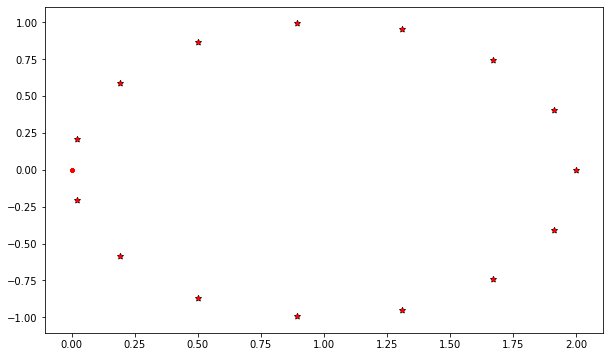

In [79]:
plt.figure(figsize = (10,6))
plt.scatter(np.array(eig(A)[0]).real, np.array(eig(A)[0]).imag, c = 'black', marker = '*')
plt.scatter(Lambda.real, Lambda.imag, c= 'red', marker = '.')

######################################################################################
#######################################################################################
#####################################################################################
 # Example of non uniform sampling

In [80]:
d = 18
f = np.random.rand(d)
L = 2*d
sigma = 2.3714e-2

Omega = [0, 4, 6, 9, 12, 14, 17]

a = np.array([1,1/2,1/8,0,0,0,0,0,0,0,0,0,0,0,0,0,1/8,1/2])

A = circulant(a)
S = Obs_op(Omega, d)

_,Sigma,_ = np.linalg.svd(obsv(A,S))
print(Sigma)
if np.linalg.matrix_rank(obsv(A,S)) == d :
    print('Observable')

Y = Samples(f, A, Omega, L)

Y_tilde = NoisySamples(Y, sigma)


[6.76320218e+05 2.83769775e+05 2.59640710e+05 2.06352741e+04
 1.28403896e+04 2.20951599e+02 1.20906441e+02 1.75377441e+00
 1.60562186e+00 1.00708245e+00 9.33867550e-01 7.37713797e-01
 7.30516021e-01 6.97436168e-01 5.13165442e-01 3.71538312e-01
 1.67034382e-01 9.99972139e-02]
Observable


In [81]:
tol2 = (4/np.sqrt(3))*np.sqrt(L)*sigma
Y_denoised = Cadzow(Y_tilde, 1, d, sigma)
f_filter = recover_signal(A, S, Y_denoised)
f_nofilter = recover_signal(A, S, Y_tilde)

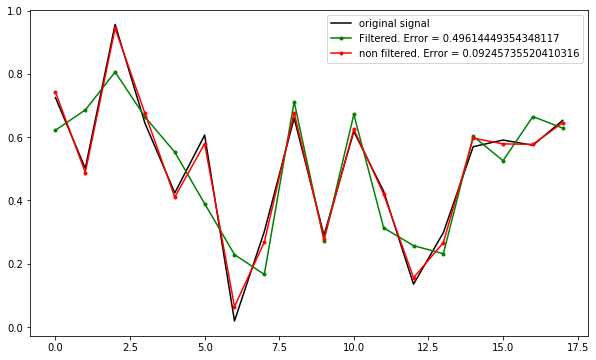

In [82]:
plt.figure(figsize = (10,6))
plt.plot(range(f.size), f, c ='black', label = 'original signal')
plt.plot(range(f_filter.size), f_filter.real, c ='green', marker = '.', 
            label = 'Filtered. Error = ' + str(norm(f-f_filter,2)))
plt.plot(range(f_nofilter.size), f_nofilter.real, c ='red', marker = '.', 
            label = 'non filtered. Error = ' + str(norm(f-f_nofilter,2)))
plt.legend()



In [83]:
tol2

0.3285908228055069

######################################################################################################
######################################################################################################
######################################################################################################
# Example of uniform sampling and symmetric operator as above:

In [84]:
np.random.seed(0)
f = np.random.rand(15)
d = f.size
Omega = range(d)#[0,3,6,9,12]
sigmas = [1e-2, 1e-3, 1e-4, 1e-5]
S = Obs_op(Omega,d)
a = np.array([1, 7/8, 3/4, 5/8, 1/2, 3/8, 1/4, 1/8, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8])
A = circulant(a)

if np.linalg.matrix_rank(obsv(A,S)) == d:
    print('Observable')
else:
    print('Non Observable. Rank = ', np.linalg.matrix_rank(obsv(A,S)) )

L = d//2-1
kmax = 10

Y = Samples(f, A, Omega, L)
Y_tilde = NoisySamples(Y, sigmas[0])

f_nofilter = recover_signal(A, S, Y_tilde)  # recover from noisy meass




Observable


In [85]:
tol3 = (4/np.sqrt(3))*np.sqrt(L//2+1)*sigmas[0]
Y_denoi = Cadzow(Y_tilde, kmax, d, sigmas[0])
f_filter = recover_signal(A, S, Y_denoi)



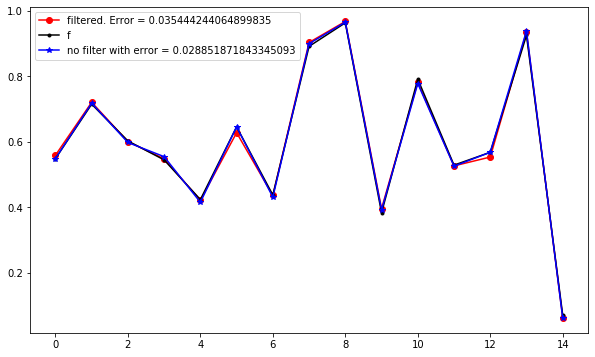

In [86]:
plt.figure(figsize=(10,6))
plt.plot(range(d), f_filter.real, marker = 'o', c = 'red', label ='filtered. Error = ' 
            + str(norm(f-f_filter,2)))
plt.plot(range(d), f, marker = '.', c = 'black', label = 'f')
plt.plot(range(d), f_nofilter, marker = '*', c ='blue', label= 'no filter with error = ' 
            + str(norm(f-f_nofilter,2)) )
plt.legend()